In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
from datetime import timedelta
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
import matplotlib.pyplot as plt



***KAGGLE DATASET EXPORT TO GOOGLE COLAB upload the big dataset (>250MB) to read data ***


In [2]:
!pip install -q kaggle

In [4]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"patrickleel","key":"af5770822d7d1c5a4039e3688b854ddc"}'}

In [5]:
! mkdir ~/.kaggle

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
!pip install --upgrade --force-reinstall --no-deps kaggle


     |████████████████████████████████| 58 kB 6.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=be594a9c250c3097fb8cdc4947277f71ff9ef8aff3c9ed6597ce5a85024d99d6
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [11]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          16868       1321  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10209        732  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4729        330  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [12]:
!kaggle datasets download -d mczielinski/bitcoin-historical-data

100% 100M/100M [00:00<00:00, 153MB/s] 
100% 100M/100M [00:00<00:00, 115MB/s]


In [13]:
! unzip bitcoin-historical-data.zip

Archive:  bitcoin-historical-data.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
btc = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
btc.sample(3)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
722329,1368657660,108.35,108.35,108.3,108.3,18.055657,1955.43,108.300127
2028290,1447403640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271475,1341606420,NaN,NaN,NaN,NaN,NaN,NaN,NaN




***Convert timestamp***

In [16]:
btc['Timestamp'] = pd.to_datetime(btc.Timestamp, unit='s')
btc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
btc.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


**Find missing %**

In [18]:
btc.isnull().sum().Open / btc.shape[0] * 100

25.602459928475803

***Remove NA value***

In [19]:
btc.dropna(how='any', inplace=True)


In [20]:
btc

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


**DatetimeIndex**

In [21]:
btc.index = btc.Timestamp
btc.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2021-03-30 23:56:00,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
2021-03-30 23:59:00,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
2021-03-31 00:00:00,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


***See if one closed up or down each day. And create binary column 0 = loss, 1= gain to have something to predict.***

In [22]:
btc['pos_neg'] = btc['Open']-btc['Close']

In [23]:
btc['Up/Down'] = np.where(btc['pos_neg'] > 0, '0','1')

In [24]:
btc.dtypes

Timestamp            datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
pos_neg                     float64
Up/Down                      object
dtype: object

In [25]:
btc

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,pos_neg,Up/Down
Timestamp,,,,,,,,,,
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,0.00,1
2011-12-31 15:50:00,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,0.00,1
2011-12-31 16:59:00,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,-0.07,1
2011-12-31 17:00:00,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,0.00,1
2012-01-01 04:16:00,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,0.00,1
...,...,...,...,...,...,...,...,...,...,...
2021-03-30 23:56:00,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,28.31,0
2021-03-30 23:57:00,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,-1.84,1
2021-03-30 23:58:00,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,-30.41,1


***Making sure the columns for feature are integer in order to make prediction.***

In [26]:
btc[['Timestamp','Open','High','Low','Close','Volume_(BTC)','Volume_(Currency)','Weighted_Price','pos_neg','Up/Down']] = btc[['Timestamp','Open','High','Low','Close','Volume_(BTC)','Volume_(Currency)','Weighted_Price','pos_neg','Up/Down']].astype(int)

***Scaling feature***

In [27]:
from sklearn.preprocessing import MinMaxScaler
cols = btc.columns.values
print (cols)

['Timestamp' 'Open' 'High' 'Low' 'Close' 'Volume_(BTC)'
 'Volume_(Currency)' 'Weighted_Price' 'pos_neg' 'Up/Down']


In [28]:
Min_max_scaler = MinMaxScaler()
btc[cols] = Min_max_scaler.fit_transform(btc[cols])
btc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,pos_neg,Up/Down
Timestamp,,,,,,,,,,
2011-12-31 07:52:00,0.000000,0.000016,0.000016,0.000049,0.000049,0.000000,1.438779e-07,0.000016,0.387962,1.0
2011-12-31 15:50:00,0.000098,0.000016,0.000016,0.000049,0.000049,0.008201,1.510718e-05,0.000016,0.387962,1.0
2011-12-31 16:59:00,0.000112,0.000016,0.000016,0.000049,0.000049,0.006322,1.230156e-05,0.000016,0.387962,1.0
2011-12-31 17:00:00,0.000113,0.000016,0.000016,0.000049,0.000049,0.001538,2.949498e-06,0.000016,0.387962,1.0
2012-01-01 04:16:00,0.000252,0.000016,0.000016,0.000049,0.000049,0.000171,4.316338e-07,0.000016,0.387962,1.0


***Spliting Data fit into linear regression***

In [49]:
X = btc[['Close']]
y = btc['Up/Down']
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=0)

In [50]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [51]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(X_test)

In [52]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[-1.72612649]]
[0.71050468]


In [53]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[ 19876, 378972],
       [ 20704, 664579]])

In [54]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [55]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[-1.72612649]])

In [56]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.6310262575119444
The Testing Accuracy is:  0.6313397550665003
              precision    recall  f1-score   support

         0.0       0.49      0.05      0.09    932202
         1.0       0.64      0.97      0.77   1597436

    accuracy                           0.63   2529638
   macro avg       0.57      0.51      0.43   2529638
weighted avg       0.58      0.63      0.52   2529638



In [57]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

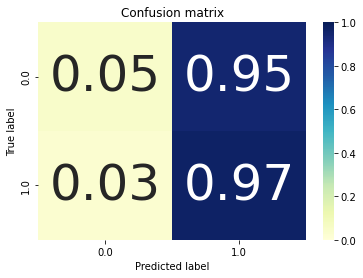

In [58]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [59]:
y = y.astype(int)

Text(0, 0.5, 'Probability of interesting for the study')

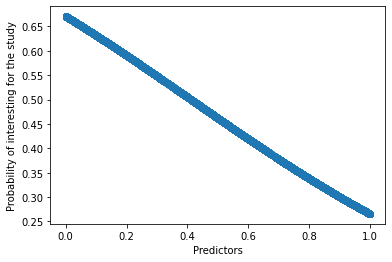

In [61]:
LogR = LogisticRegression()
LogR.fit(X,np.ravel(y.astype(int)))

#matplotlib scatter funcion w/ logistic regression
plt.scatter(X,LogR.predict_proba(X)[:,1])
plt.xlabel("Predictors")
plt.ylabel("Probability of interesting for the study")
